# COMP/BUSI 488-003 Team Assignment 2
### COMP 488-003 Team 2
Bernie Chen, Kai Snyder, Nahum Yared, Shreya Gundam, Skye Southall, Xiaohan Wang

In [ ]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
filepath = "/content/accepted_2007_to_2018Q4.csv"
data_df = pd.read_csv(filepath)

data_df.head()

# data_df = pd.read_csv('accepted_2007_to_2018Q4.csv')

# data_df.head()

/var/folders/39/wsgn0nfs4mb3w_gnxtgrj6bm0000gn/T/ipykernel_28932/309280479.py:6: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('accepted_2007_to_2018Q4.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# Business Question
### How do we identify profitable and low(er)-risk loans?

Criteria for Evaluation: risk-adjusted returns, taking into account the loan’s purpose, its term, and applicant FICO score

Risk Assessment: factors linked to high probability of default and variance of returns

### Our Primary Stakeholder: Dr. D


# Data Pre-Processing


In [ ]:
# Import dataset
loan_data = data_df.copy()
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First, lets get some descriptive statistics

In [ ]:
loan_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


There are a lot of columns, so before we continue, lets select some that will eventually be relevant for our analysis:

annual_inc, annual_inc_joint, application_type, dti, dti_joint, fico_range_low, emp_length, home_ownership, int_rate, loan_amnt, loan_status, purpose, term

In [ ]:
loan_relevant = loan_data[["annual_inc", "annual_inc_joint", "application_type", "dti", "dti_joint",
                           "fico_range_low", "emp_length", "home_ownership", "int_rate", "loan_amnt", "loan_status",
                           "purpose", "term"]].copy()
loan_relevant

,annual_inc,annual_inc_joint,application_type,dti,dti_joint,fico_range_low,emp_length,home_ownership,int_rate,loan_amnt,loan_status,purpose,term
0,55000.0,NaN,Individual,5.91,NaN,675.0,10+ years,MORTGAGE,13.99,3600.0,Fully Paid,debt_consolidation,36 months
1,65000.0,NaN,Individual,16.06,NaN,715.0,10+ years,MORTGAGE,11.99,24700.0,Fully Paid,small_business,36 months
2,63000.0,71000.0,Joint App,10.78,13.85,695.0,10+ years,MORTGAGE,10.78,20000.0,Fully Paid,home_improvement,60 months
3,110000.0,NaN,Individual,17.06,NaN,785.0,10+ years,MORTGAGE,14.85,35000.0,Current,debt_consolidation,60 months
4,104433.0,NaN,Individual,25.37,NaN,695.0,3 years,MORTGAGE,22.45,10400.0,Fully Paid,major_purchase,60 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,227000.0,NaN,Individual,12.75,NaN,705.0,9 years,MORTGAGE,10.49,40000.0,Current,debt_consolidation,60 months
2260697,110000.0,NaN,Individual,18.30,NaN,660.0,6 years,RENT,14.49,24000.0,Charged Off,debt_consolidation,60 months
2260698,95000.0,NaN,Individual,23.36,NaN,660.0,10+ years,MORTGAGE,14.49,14000.0,Current,debt_consolidation,60 months
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now lets examine the data types of each column's values, as well as unique value counts, to check for any anomalies.

In [ ]:
loan_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   annual_inc        float64
 1   annual_inc_joint  float64
 2   application_type  object 
 3   dti               float64
 4   dti_joint         float64
 5   fico_range_low    float64
 6   emp_length        object 
 7   home_ownership    object 
 8   int_rate          float64
 9   loan_amnt         float64
 10  loan_status       object 
 11  purpose           object 
 12  term              object 
dtypes: float64(7), object(6)
memory usage: 224.2+ MB


In [ ]:
loan_relevant.nunique()

annual_inc          89368
annual_inc_joint    17633
application_type        2
dti                 10845
dti_joint            4018
fico_range_low         48
emp_length             11
home_ownership          6
int_rate              673
loan_amnt            1572
loan_status             9
purpose                14
term                    2
dtype: int64

Lets examine all columns with object data types and check their column values to change them if necessary.

In [ ]:
loan_relevant["application_type"].value_counts()

application_type
Individual    2139958
Joint App      120710
Name: count, dtype: int64

In [ ]:
# Change "application_type" column into a indicator variable column, "joint_status"
loan_relevant["joint_status"] = loan_relevant["application_type"].apply(lambda x: 1 if x == "Joint App" else 0)
loan_relevant = loan_relevant.drop(columns=["application_type"], axis=1)
loan_relevant["joint_status"]

0          0
1          0
2          1
3          0
4          0
          ..
2260696    0
2260697    0
2260698    0
2260699    0
2260700    0
Name: joint_status, Length: 2260701, dtype: int64

In [ ]:
loan_relevant["emp_length"].value_counts()

emp_length
10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: count, dtype: int64

In [ ]:
# Turn values in "emp_length" column into dummy variables with "< 1 year" as the base group
dummies_emp_length = pd.get_dummies(loan_relevant["emp_length"], dtype=int)
dummies_emp_length.drop(columns=["< 1 year"], axis=1, inplace=True)
loan_relevant = loan_relevant.drop(columns=["emp_length"], axis=1).join(dummies_emp_length)
loan_relevant[dummies_emp_length.columns]

,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2260696,0,0,0,0,0,0,0,0,0,1
2260697,0,0,0,0,0,0,1,0,0,0
2260698,0,1,0,0,0,0,0,0,0,0
2260699,0,0,0,0,0,0,0,0,0,0


In [ ]:
loan_relevant["home_ownership"].value_counts()

home_ownership
MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: count, dtype: int64

In [ ]:
# Turn values in "home_ownership" column into dummy variables with "RENT" as the base group
dummies_home_ownership = pd.get_dummies(loan_relevant["home_ownership"], dtype=int)
dummies_home_ownership = dummies_home_ownership.drop(columns=["RENT"], axis=1)
loan_relevant = loan_relevant.drop(columns=["home_ownership"], axis=1).join(dummies_home_ownership)
loan_relevant[dummies_home_ownership.columns]

,ANY,MORTGAGE,NONE,OTHER,OWN
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
2260696,0,1,0,0,0
2260697,0,0,0,0,0
2260698,0,1,0,0,0
2260699,0,0,0,0,0


In [ ]:
loan_relevant["loan_status"].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [ ]:
# Drop rows with values "Current", "Late (31-120 days)", "In Grace Period", and "Late (16-30 days)" in the "loan_status" column
loan_relevant = loan_relevant[~loan_relevant["loan_status"].isin(["Current", "Late (31-120 days)", "In Grace Period", "Late (16-30 days)"])]
loan_relevant["loan_status"].value_counts()

loan_status
Fully Paid                                             1076751
Charged Off                                             268559
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [ ]:
# Create "paid_off" column that is an indicator variable which assumes 1 when the loan has the value "Fully Paid" in the "loan_status" column, and 0 otherwise
loan_relevant["paid_off"] = loan_relevant["loan_status"].apply(lambda x: 1 if x == "Fully Paid" else 0)
loan_relevant = loan_relevant.drop(columns=["loan_status"], axis=1)
loan_relevant["paid_off"]

0          1
1          1
2          1
4          1
5          1
          ..
2260691    0
2260692    1
2260697    0
2260699    0
2260700    0
Name: paid_off, Length: 1348132, dtype: int64

In [ ]:
loan_relevant["purpose"].value_counts()

purpose
debt_consolidation    781442
credit_card           295625
home_improvement       87721
other                  78301
major_purchase         29550
medical                15614
small_business         15577
car                    14652
moving                  9526
vacation                9084
house                   7298
wedding                 2350
renewable_energy         936
educational              423
Name: count, dtype: int64

In [ ]:
# Turn values in "purpose" column into dummy variables with "debt_consolidation" as the base group
dummies_purpose = pd.get_dummies(loan_relevant["purpose"], dtype=int)
dummies_purpose = dummies_purpose.drop(columns=["debt_consolidation"], axis=1)
loan_relevant = loan_relevant.drop(columns=["purpose"], axis=1).join(dummies_purpose)
loan_relevant[dummies_purpose.columns]

,car,credit_card,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260691,0,0,0,1,0,0,0,0,0,0,0,0,0
2260692,0,0,0,0,0,0,1,0,0,0,0,0,0
2260697,0,0,0,0,0,0,0,0,0,0,0,0,0
2260699,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
loan_relevant["term"].value_counts()

term
 36 months    1023206
 60 months     324893
Name: count, dtype: int64

In [ ]:
# Turn values in "term" column into dummy variables with " 36 months" as the base group
dummies_term = pd.get_dummies(loan_relevant["term"], dtype=int)
dummies_term = dummies_term.drop(columns=[" 36 months"], axis=1)
loan_relevant = loan_relevant.drop(columns=["term"], axis=1).join(dummies_term)
loan_relevant[dummies_term.columns]

,60 months
0,0
1,0
2,1
4,1
5,0
...,...
2260691,1
2260692,1
2260697,1
2260699,0


Now lets use the quantitative columns to derive new columns based on certain qualities of each loan.

In [ ]:
# Create "income" column which equals "annual_inc" when "joint_status" equals 0, else it equals "annual_inc_joint", then use that to create "income/1000"
condition = loan_relevant["joint_status"] == 1
loan_relevant["income"] = np.where(condition, loan_relevant["annual_inc_joint"], loan_relevant["annual_inc"])
loan_relevant = loan_relevant.drop(columns=["annual_inc", "annual_inc_joint"], axis=1)
loan_relevant["income"]

0           55000.0
1           65000.0
2           71000.0
4          104433.0
5           34000.0
             ...   
2260691    157000.0
2260692    150000.0
2260697    110000.0
2260699         NaN
2260700         NaN
Name: income, Length: 1348132, dtype: float64

In [ ]:
loan_relevant["income/1000"] = loan_relevant["income"] / 1000
loan_relevant = loan_relevant.drop(columns=["income"], axis=1)
loan_relevant["income/1000"]

0           55.000
1           65.000
2           71.000
4          104.433
5           34.000
            ...   
2260691    157.000
2260692    150.000
2260697    110.000
2260699        NaN
2260700        NaN
Name: income/1000, Length: 1348132, dtype: float64

In [ ]:
# Perform a similar operation for a new "debt_to_income" column
condition = loan_relevant["joint_status"] == 1
loan_relevant["debt_to_income"] = np.where(condition, loan_relevant["dti_joint"], loan_relevant["dti"])
loan_relevant = loan_relevant.drop(columns=["dti", "dti_joint"], axis=1)
loan_relevant["debt_to_income"]

0           5.91
1          16.06
2          13.85
4          25.37
5          10.20
           ...  
2260691    10.34
2260692    12.25
2260697    18.30
2260699      NaN
2260700      NaN
Name: debt_to_income, Length: 1348132, dtype: float64

In [ ]:
# Use the "fico_range_low" column to group loans into Experian credit bins in a new column "credit_bin", and then use this column to create dummy variables for
# each column with 'F' as the base group
bins = [579, 669, 739, 799, 850]
labels = ['Fair', 'Good', 'Very Good', 'Excellent']
loan_relevant["experian_credit_bin"] = pd.cut(loan_relevant['fico_range_low'], bins=bins, labels=labels, right=False)
loan_relevant = loan_relevant.drop(columns=["fico_range_low"], axis=1)
loan_relevant["experian_credit_bin"]

0          Good
1          Good
2          Good
4          Good
5          Good
           ... 
2260691    Good
2260692    Fair
2260697    Fair
2260699     NaN
2260700     NaN
Name: experian_credit_bin, Length: 1348132, dtype: category
Categories (4, object): ['Fair' < 'Good' < 'Very Good' < 'Excellent']

In [ ]:
dummies_fico = pd.get_dummies(loan_relevant["experian_credit_bin"], dtype=int)
dummies_fico = dummies_fico.drop(columns=['Fair'], axis=1)
loan_relevant = loan_relevant.drop(columns=["experian_credit_bin"], axis=1).join(dummies_fico)
loan_relevant[dummies_fico.columns]

,Good,Very Good,Excellent
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
2260691,1,0,0
2260692,0,0,0
2260697,0,0,0
2260699,0,0,0


In [ ]:
# Lets divide "loan_amnt" into "loan_amnt/1000"
loan_relevant["loan_amnt/1000"] = loan_relevant["loan_amnt"] / 1000
loan_relevant = loan_relevant.drop(columns=["loan_amnt"], axis=1)
loan_relevant["loan_amnt/1000"]

0           3.60
1          24.70
2          20.00
4          10.40
5          11.95
           ...  
2260691    32.00
2260692    16.00
2260697    24.00
2260699      NaN
2260700      NaN
Name: loan_amnt/1000, Length: 1348132, dtype: float64

Now lets take a look at our fully processed dataframe.

In [ ]:
loan_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348132 entries, 0 to 2260700
Data columns (total 38 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   int_rate          1348099 non-null  float64
 1   joint_status      1348132 non-null  int64  
 2   1 year            1348132 non-null  int64  
 3   10+ years         1348132 non-null  int64  
 4   2 years           1348132 non-null  int64  
 5   3 years           1348132 non-null  int64  
 6   4 years           1348132 non-null  int64  
 7   5 years           1348132 non-null  int64  
 8   6 years           1348132 non-null  int64  
 9   7 years           1348132 non-null  int64  
 10  8 years           1348132 non-null  int64  
 11  9 years           1348132 non-null  int64  
 12  ANY               1348132 non-null  int64  
 13  MORTGAGE          1348132 non-null  int64  
 14  NONE              1348132 non-null  int64  
 15  OTHER             1348132 non-null  int64  
 16  OWN  

In [ ]:
loan_relevant.isna().any()

int_rate             True
joint_status        False
1 year              False
10+ years           False
2 years             False
3 years             False
4 years             False
5 years             False
6 years             False
7 years             False
8 years             False
9 years             False
ANY                 False
MORTGAGE            False
NONE                False
OTHER               False
OWN                 False
paid_off            False
car                 False
credit_card         False
educational         False
home_improvement    False
house               False
major_purchase      False
medical             False
moving              False
other               False
renewable_energy    False
small_business      False
vacation            False
wedding             False
 60 months          False
income/1000          True
debt_to_income       True
Good                False
Very Good           False
Excellent           False
loan_amnt/1000       True
dtype: bool

There appears to be rows with null values in a myriad of columns, to deal with them, we need to know for how many rows this appears to be case for.

In [ ]:
loan_relevant[loan_relevant.isnull().any(axis=1)]

,int_rate,joint_status,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,...,small_business,vacation,wedding,60 months,income/1000,debt_to_income,Good,Very Good,Excellent,loan_amnt/1000
62796,10.99,1,0,0,0,0,0,0,0,0,...,0,0,0,0,109.72,NaN,1,0,0,18.000
421095,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,0,NaN
421096,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,0,NaN
528961,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,0,NaN
528962,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,0,NaN
651664,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,0,NaN
651665,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,0,NaN
749520,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,0,NaN
749521,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,0,NaN
877716,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,0,NaN


There appears to be a small amount of null values, so lets drop these rows.

In [ ]:
loan_relevant = loan_relevant.dropna()
loan_relevant.isnull().any()

int_rate            False
joint_status        False
1 year              False
10+ years           False
2 years             False
3 years             False
4 years             False
5 years             False
6 years             False
7 years             False
8 years             False
9 years             False
ANY                 False
MORTGAGE            False
NONE                False
OTHER               False
OWN                 False
paid_off            False
car                 False
credit_card         False
educational         False
home_improvement    False
house               False
major_purchase      False
medical             False
moving              False
other               False
renewable_energy    False
small_business      False
vacation            False
wedding             False
 60 months          False
income/1000         False
debt_to_income      False
Good                False
Very Good           False
Excellent           False
loan_amnt/1000      False
dtype: bool

In [ ]:
loan_relevant

,int_rate,joint_status,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,...,small_business,vacation,wedding,60 months,income/1000,debt_to_income,Good,Very Good,Excellent,loan_amnt/1000
0,13.99,0,0,1,0,0,0,0,0,0,...,0,0,0,0,55.000,5.91,1,0,0,3.60
1,11.99,0,0,1,0,0,0,0,0,0,...,1,0,0,0,65.000,16.06,1,0,0,24.70
2,10.78,1,0,1,0,0,0,0,0,0,...,0,0,0,1,71.000,13.85,1,0,0,20.00
4,22.45,0,0,0,0,1,0,0,0,0,...,0,0,0,1,104.433,25.37,1,0,0,10.40
5,13.44,0,0,0,0,0,1,0,0,0,...,0,0,0,0,34.000,10.20,1,0,0,11.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,9.49,0,0,0,0,0,0,1,0,0,...,0,0,0,1,130.000,20.59,1,0,0,18.00
2260690,13.99,0,0,0,0,0,0,0,0,0,...,0,0,0,1,180.792,22.03,1,0,0,29.40
2260691,14.49,0,0,0,0,1,0,0,0,0,...,0,0,0,1,157.000,10.34,1,0,0,32.00
2260692,12.79,0,0,1,0,0,0,0,0,0,...,0,0,0,1,150.000,12.25,0,0,0,16.00


# Key Assumptions
- FICO score takes into account a lot of applicant information already -> no need to do extra analysis on that
- Only looked at fully paid, charged off, and defaulted loans used experian for loan grade bins, took lower range
- Assumed Standard Deviation of loans = riskiness of loan
- Relevant Loans -> Grouped together Charged Off and Defaulted loans as unsuccessful
- Risk-Free Rate -> Used as the treasury rate for computing Sharpe Ratio, which is our metric of choice for risk-adjusted returns


# Probability of Default with Logistic Regression

First, lets create a correlation matrix of our independent variables to examine multicollinearity issues.

In [ ]:
print(loan_relevant.drop(columns=["paid_off"], axis=1).corr())

                  int_rate  joint_status    1 year  10+ years   2 years  \
int_rate          1.000000      0.040008  0.002324  -0.007809  0.000638   
joint_status      0.040008      1.000000 -0.010419  -0.021996 -0.008715   
1 year            0.002324     -0.010419  1.000000  -0.185727 -0.083824   
10+ years        -0.007809     -0.021996 -0.185727   1.000000 -0.220664   
2 years           0.000638     -0.008715 -0.083824  -0.220664  1.000000   
3 years          -0.001020     -0.009610 -0.078334  -0.206213 -0.093070   
4 years           0.001106     -0.006840 -0.067053  -0.176515 -0.079666   
5 years           0.002010     -0.008653 -0.068612  -0.180621 -0.081519   
6 years           0.004792     -0.010026 -0.058752  -0.154663 -0.069804   
7 years           0.005572     -0.011528 -0.057189  -0.150548 -0.067946   
8 years          -0.001839     -0.012206 -0.057731  -0.151975 -0.068590   
9 years          -0.000011     -0.010626 -0.052679  -0.138677 -0.062589   
ANY               0.00168

One thing we noticed after processing the data is that loans for an "educational" purpose are few in our data.

In [ ]:
loan_relevant["educational"].value_counts()

educational
0    1347669
1        423
Name: count, dtype: int64

Because of this, we cannot use it as an indicator variable in our regression due to a lack of variability (which will create a singular matrix error). Therefore, we must drop it and cannot use it in our model.

Now, lets use Logistic Regression to model the probability of default and identify factors that signal less riskier loans.

In [ ]:
# Get dependent and independent variables
X_logit = sm.add_constant(loan_relevant.drop(columns=["paid_off", "educational"], axis=1))
y_logit = loan_relevant["paid_off"]

# Run regression (with robust covariance matrix estimator) and print summary
model = sm.Logit(endog=y_logit, exog=X_logit).fit(cov_type="HC3")
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.460525
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               paid_off   No. Observations:              1348092
Model:                          Logit   Df Residuals:                  1348055
Method:                           MLE   Df Model:                           36
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                 0.08293
Time:                        15:48:55   Log-Likelihood:            -6.2083e+05
converged:                       True   LL-Null:                   -6.7697e+05
Covariance Type:                  HC3   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.5682      0.014    184.796      0.000       2.541       2.595
int_rate   

With the base classes being "debt_consolidation", "< 1 year", and "RENT"

Now lets get the average probabilities of default for each of our previous factors of interest, credit bins and purposes

In [ ]:
prob_y = model.predict(X_logit)
print("Average probability of default: " + str(1 - np.mean(prob_y)) + "\n")

# Account for base group
data_purpose = pd.DataFrame(columns=["Purpose", "Average Probability of Default"])
X_debt = X_logit[(X_logit["car"] == 0) & (X_logit["credit_card"] == 0) & (X_logit["home_improvement"] == 0) & (X_logit["house"] == 0) & (X_logit["major_purchase"] == 0) & (X_logit["medical"] == 0) & (X_logit["moving"] == 0) & (X_logit["other"] == 0) & (X_logit["renewable_energy"] == 0) & (X_logit["small_business"] == 0) & (X_logit["vacation"] == 0)]
prob = model.predict(X_debt)
print("Average probability of default for 'debt_consolidation' loans: " + str(1 - np.mean(prob)))
data_purpose.loc[0] = ['debt_consolidation', (1 - np.mean(prob))]

purposes = dummies_purpose.drop(columns=["educational"])
i = 1
for purpose in purposes:
    prob = model.predict(X_logit[X_logit[purpose] == 1])
    print(f"Average probability of default for '{purpose}' loans: " + str(1 - np.mean(prob)))
    data_purpose.loc[i] = [purpose, (1 - np.mean(prob))]
    i += 1

print("\n")

# Account for base group
data_fico = pd.DataFrame(columns=["Credit Bin", "Average Probability of Default"])
X_F = X_logit[(X_logit["Excellent"] == 0) & (X_logit["Very Good"] == 0) & (X_logit["Good"] == 0)]
prob = model.predict(X_F)
print("Average probability of default for credit bin 'Fair': " + str(1 - np.mean(prob)))
data_fico.loc[0] = ['F', (1 - np.mean(prob))]

i = 1
for bin in dummies_fico:
  prob = model.predict(X_logit[X_logit[bin] == 1])
  print(f"Average probability of default for credit bin '{bin}': " + str(1 - np.mean(prob)))
  data_fico.loc[i] = [bin, (1 - np.mean(prob))]
  i += 1

print("\n")

# Account for base group
data_term = pd.DataFrame(columns=["Term Length", "Average Probability of Default"])
X_term = X_logit[(X_logit[" 60 months"] == 0)]
prob = model.predict(X_term)
print("Average probability of default for 36-month term loan: " + str(1 - np.mean(prob)))
data_term.loc[0] = ["36 months", (1 - np.mean(prob))]

i = 1
for term in dummies_term:
  prob = model.predict(X_logit[X_logit[term] == 1])
  print(f"Average probability of default for 60-month term loan: " + str(1 - np.mean(prob)))
  data_term.loc[i] = ["60 months", (1 - np.mean(prob))]
  i += 1

Average probability of default: 0.20128003133317296

Average probability of default for 'debt_consolidation' loans: 0.21247188260317362
Average probability of default for 'car' loans: 0.15069615069615072
Average probability of default for 'credit_card' loans: 0.17024270613107817
Average probability of default for 'home_improvement' loans: 0.17919312365340112
Average probability of default for 'house' loans: 0.22362291038640725
Average probability of default for 'major_purchase' loans: 0.1894416243654823
Average probability of default for 'medical' loans: 0.2207634174458819
Average probability of default for 'moving' loans: 0.23724543355028338
Average probability of default for 'other' loans: 0.21465701112430868
Average probability of default for 'renewable_energy' loans: 0.23931623931623935
Average probability of default for 'small_business' loans: 0.30435899081979845
Average probability of default for 'vacation' loans: 0.19341699691765746
Average probability of default for 'wedding' l

Lets create bar graphs for each categorical group

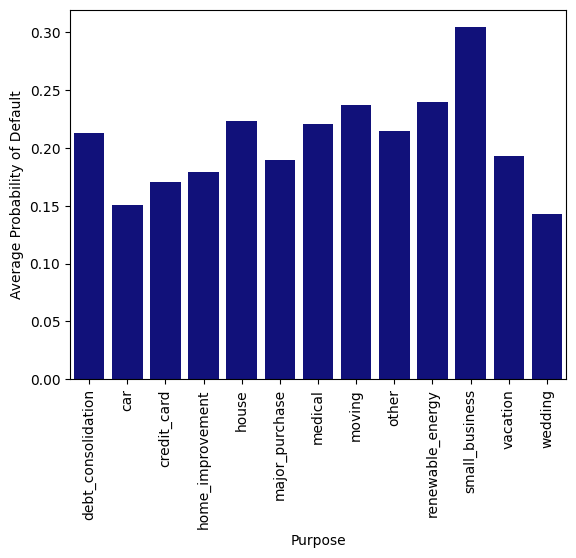

In [ ]:
# For "purpose" graph
ax = sns.barplot(x="Purpose", y="Average Probability of Default", data=data_purpose, color="darkblue")
plt.xticks(rotation=90)
plt.show()

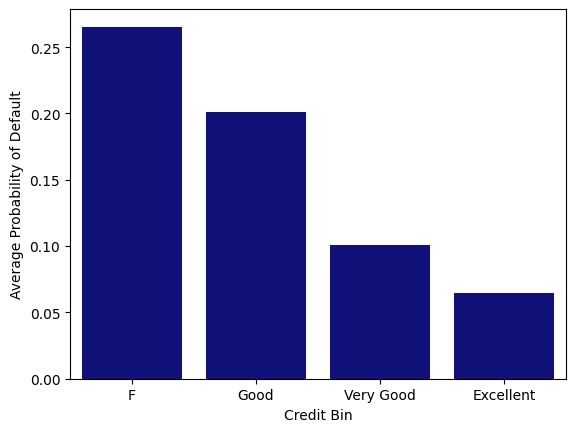

In [ ]:
# For 'bin' graph
ax = sns.barplot(x="Credit Bin", y="Average Probability of Default", data=data_fico, color="darkblue")
plt.xlabel("Credit Bin")
plt.ylabel("Average Probability of Default")
plt.show()

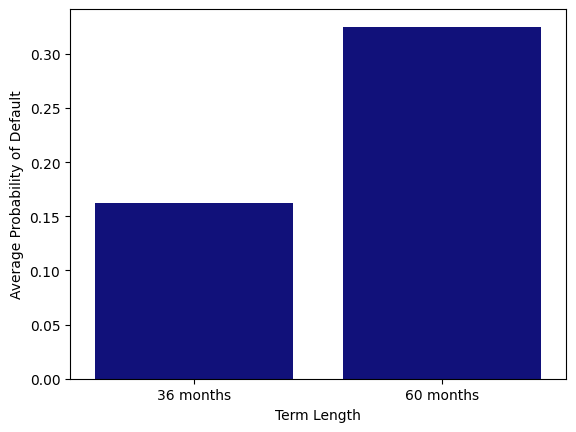

In [ ]:
# For 'term' graph
ax = sns.barplot(x="Term Length", y="Average Probability of Default", data=data_term, color="darkblue")
plt.xlabel("Term Length")
plt.ylabel("Average Probability of Default")
plt.show()

# Risk-Adjusted Returns


First, let's understand how loan grade effects the applicant and loan value by looking at the median for each column.

In [ ]:
data = data_df.copy()

data.groupby('grade')[['fico_range_high', 'fico_range_low', 'funded_amnt', 'int_rate', 'tot_hi_cred_lim', 'bc_util', 'percent_bc_gt_75', 'total_rec_int', 'total_pymnt', 'total_rec_prncp']].median().reset_index()

,grade,fico_range_high,fico_range_low,funded_amnt,int_rate,tot_hi_cred_lim,bc_util,percent_bc_gt_75,total_rec_int,total_pymnt,total_rec_prncp
0,A,729.0,725.0,12000.0,7.24,175882.0,38.3,11.1,813.340,8459.346207,7500.000
1,B,699.0,695.0,12000.0,10.75,116132.0,57.8,33.3,1305.160,8973.146407,7322.250
2,C,689.0,685.0,13000.0,13.99,99630.0,67.1,50.0,1891.590,9343.800000,6707.410
3,D,684.0,680.0,14400.0,17.99,90346.0,72.2,50.0,2462.905,9785.800000,6085.355
4,E,679.0,675.0,16000.0,21.48,93545.0,75.0,60.0,3727.060,12690.870000,7063.800
5,F,679.0,675.0,18125.0,24.89,93564.0,77.0,60.0,4976.425,14553.850000,6874.195
6,G,679.0,675.0,19775.0,28.18,96131.0,75.3,60.0,5410.935,14778.791399,5694.140


It seems that grade is correlated with the fico score range, we can dig deeper to see if they is a direct relationship by looking at the min for each grade

In [ ]:
data.groupby('grade')[['fico_range_high', 'fico_range_low']].min().reset_index()

,grade,fico_range_high,fico_range_low
0,A,664.0,660.0
1,B,664.0,660.0
2,C,664.0,660.0
3,D,644.0,640.0
4,E,634.0,630.0
5,F,624.0,620.0
6,G,614.0,610.0


Grade doesn't seem to be directly separated by fico score ranges so we will group them ourselves based on the Expedian Fico Ranges for the following analysis.

In [ ]:
data['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

We want to look at only completed loans to calculate the expected returns for each loan. In addition, we want to split them up depending on each loan's term length.

In [ ]:
complete_loans = data[data['loan_status'].isin(['Fully Paid', 'Charged Off', 'Defaulted'])]

sample = complete_loans[['term', 'fico_range_low', 'purpose', 'grade', 'sub_grade', 'funded_amnt', 'int_rate', 'total_rec_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee']].copy()

sample_3y = sample[sample['term'] == ' 36 months'].copy()
sample_5y = sample[sample['term'] == ' 60 months'].copy()

In [ ]:
sample_3y.groupby('grade')[['fico_range_low', 'funded_amnt', 'int_rate', 'total_rec_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee']].median().reset_index()

,grade,fico_range_low,funded_amnt,int_rate,total_rec_prncp,total_pymnt,total_rec_int,total_rec_late_fee
0,A,720.0,12000.0,7.26,11686.15,12480.305421,952.800,0.0
1,B,690.0,10000.0,10.91,10000.00,10992.340647,1234.130,0.0
2,C,680.0,10000.0,13.98,8000.00,9891.824917,1410.100,0.0
3,D,675.0,10000.0,17.57,7500.00,9613.509546,1686.200,0.0
4,E,675.0,9575.0,20.99,6375.00,8834.873993,1832.225,0.0
5,F,670.0,8325.0,24.50,4800.00,7287.005000,1806.035,0.0
6,G,670.0,11625.0,28.49,4681.82,8232.020000,2116.800,0.0


In [ ]:
sample_5y.groupby('grade')[['fico_range_low', 'funded_amnt', 'int_rate', 'total_rec_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee']].median().reset_index()

,grade,fico_range_low,funded_amnt,int_rate,total_rec_prncp,total_pymnt,total_rec_int,total_rec_late_fee
0,A,750.0,19000.0,7.89,18000.00,19700.990229,1931.490,0.0
1,B,720.0,20000.0,10.90,17000.00,20210.090017,2730.390,0.0
2,C,695.0,18450.0,14.08,15000.00,18666.945008,3366.035,0.0
3,D,685.0,19200.0,17.57,14000.00,18145.770000,4097.980,0.0
4,E,680.0,20000.0,20.75,12247.58,18244.360223,4800.850,0.0
5,F,675.0,20000.0,24.11,11200.00,17806.830000,5278.180,0.0
6,G,675.0,20200.0,27.31,10000.00,17014.990012,5093.020,0.0


Check if there are any missing data

In [ ]:
sample_3y.isnull().any()

term                  False
fico_range_low        False
purpose               False
grade                 False
sub_grade             False
funded_amnt           False
int_rate              False
total_rec_prncp       False
total_pymnt           False
total_rec_int         False
total_rec_late_fee    False
dtype: bool

In [ ]:
sample_5y.isnull().any()

term                  False
fico_range_low        False
purpose               False
grade                 False
sub_grade             False
funded_amnt           False
int_rate              False
total_rec_prncp       False
total_pymnt           False
total_rec_int         False
total_rec_late_fee    False
dtype: bool

Now, we can group each loan based on the lower-end of the loan's FICO score based Expedian's ranges.   

Returns are calculated by finding the difference between the total payments made on the loan and the loan's funded amount. We can take the percentage to estimate the expected return.  

Adding the sample count for each FICO range helps measure the reliability of the expected return data as well as finding the standard deviation helps estimate the risk associated with each loan type and FICO range.

**Sharpe Ratio for Loan Purpose**

To evaluate the performance of loans while considering the risk involved, we use the **Sharpe Ratio**. This measure allows us to calculate the risk-adjusted return for each loan purpose.

The formula for the Sharpe Ratio is:

Where:

- **Mean Portfolio Return** is the average return of the investment
- **Risk-Free Rate** is the return of a risk-free security, typically government bonds (We used Term Treasury Rate)
- **Standard Deviation of Portfolio Return** is the standard deviation of the investment return, representing the investment's volatility or risk

By applying this formula, we can assess how much excess return we are receiving for the extra volatility that we endure for holding a riskier asset.

- 3-year Treasury Rate: **4.42**
- 5-year Treasury Rate: **4.26**

In [ ]:
def create_returns_df(sample, rf=0):
    # Define FICO score bins and labels
    bins = [579, 669, 739, 799, 850]
    labels = ['Fair', 'Good', 'Very Good', 'Exceptional']

    # Create a new column 'fico_score_group' for categorized FICO scores
    sample['fico_score_group'] = pd.cut(sample['fico_range_low'], bins=bins, labels=labels, right=False)

    sample['total_return'] = sample['total_pymnt'] - sample['funded_amnt']
    sample['p_return'] = sample['total_return'] / sample['funded_amnt'] * 100

    # Group by 'purpose' and the new 'fico_score_group' column
    s = sample.groupby(['purpose', 'fico_score_group'], observed=True)[['total_return', 'p_return']].median()

    counts = sample.groupby(['purpose', 'fico_score_group'], observed=True).size()
    counts_df = counts.reset_index(name='count')

    stds = sample.groupby(['purpose', 'fico_score_group'], observed=True)['p_return'].std().reset_index(name='std_p_return')

    s_reset = s.reset_index()

    s_merged = pd.merge(s_reset, counts_df, on=['purpose', 'fico_score_group'])
    s_merged = pd.merge(s_merged, stds, on=['purpose', 'fico_score_group'])

    s_final = s_merged.set_index(['purpose', 'fico_score_group'])
    s_final['sharpe_ratio'] = (s_final['p_return'] - rf) / s_final['std_p_return']

    return s_final

pd.set_option('display.max_rows', None)
final_3y = create_returns_df(sample_3y, 4.42)
final_5y = create_returns_df(sample_5y, 4.26)

display(final_3y)
display(final_5y)

total_return   p_return   count  \
purpose            fico_score_group                                    
car                Fair                714.715653  13.537714    1875   
                   Good                607.355376  11.043439    7833   
                   Very Good           435.929501   8.020885    2097   
                   Exceptional         421.196331   7.769000     381   
credit_card        Fair               1086.661725  13.047252   39118   
                   Good               1195.778211  11.317134  171705   
                   Very Good           870.147671   8.275960   20803   
                   Exceptional         626.945144   6.859755    1628   
debt_consolidation Fair               1103.280942  13.483564  108810   
                   Good               1206.001838  11.921718  406649   
                   Very Good           914.721090   8.295568   49636   
                   Exceptional         738.205973   6.826332    4913   
educational        Fair                854.647842  21.055529      25   
                   Good                663.890683  16.076043     207   
                   Very Good           615.397740  12.045920      76   
                   Exceptional         202.811623  10.118984       2   
home_improvement   Fair                897.989431  13.455645   10432   
                   Good                857.087035  10.930001   43240   
                   Very Good           713.396113   7.795395    9818   
                   Exceptional         672.013573   6.746385    2372   
house              Fair                857.940000  10.923179     835   
                   Good                750.079757   8.883714    3415   
                   Very Good           676.095282   6.097180     904   
                   Exceptional         526.880000   3.806100     179   
major_purchase     Fair                676.691311  13.412458    3461   
                   Good                635.335956  11.039996   14869   
                   Very Good           497.645609   8.010357    4307   
                   Exceptional         504.514637   6.835087     846   
medical            Fair                539.259271  13.821000    2505   
                   Good                528.297930  11.288799    8879   
                   Very Good           462.502425   7.682580    1556   
                   Exceptional         371.353284   5.237358     312   
moving             Fair                524.428381  14.357871    1654   
                   Good                507.933231  12.172129    5704   
                   Very Good           361.311299   8.357613     970   
                   Exceptional         505.500000   6.266508      99   
other              Fair                632.894666  14.333518   12163   
                   Good                591.309167  12.005443   44496   
                   Very Good           450.168757   7.412208    7726   
                   Exceptional         438.060799   5.906573    1219   
renewable_energy   Fair                591.838014  13.509841     142   
                   Good                563.068800  12.613321     552   
                   Very Good           549.228715   9.309029      84   
                   Exceptional        1189.679912   9.119246      20   
small_business     Fair               1035.925980  16.106157    1892   
                   Good               1114.504411  13.721258    7894   
                   Very Good           956.775962   9.473200    1785   
                   Exceptional        1266.024315   8.985623     261   
vacation           Fair                432.565000  13.967012    1552   
                   Good                384.113814  11.146385    5751   
                   Very Good           287.879705   7.267824    1022   
                   Exceptional         268.750000   4.958230     163   
wedding            Fair               1372.270000  24.912575     203   
                   Good               1221.443252  17.950615    1317   
     

total_return   p_return   count  \
purpose            fico_score_group                                    
car                Fair               1479.092551  11.329111     274   
                   Good               1436.806590  13.679243    1570   
                   Very Good          1246.144365  14.374875     505   
                   Exceptional        1110.601157  10.059592      50   
credit_card        Fair               1844.220000  11.297758    9779   
                   Good               2439.021846  13.638655   47928   
                   Very Good          2123.326281  11.820198    4098   
                   Exceptional        1746.967594   8.571456     220   
debt_consolidation Fair               1629.220000  10.018973   35940   
                   Good               2309.065408  12.979597  156710   
                   Very Good          2166.281067  11.453705   16311   
                   Exceptional        1927.854856   9.534729    1352   
educational        Fair                537.950000  17.566250       3   
                   Good               1182.099337  30.150960      11   
                   Exceptional        1074.370002  15.522429       2   
home_improvement   Fair               2027.600000  12.635812    3130   
                   Good               2097.554240  11.904045   14603   
                   Very Good          1858.679579  10.110928    3280   
                   Exceptional        1784.048801   8.868679     629   
house              Fair                311.875000   2.067994     254   
                   Good               1324.736289   7.086590    1260   
                   Very Good          1162.584611   5.611984     344   
                   Exceptional        1751.974013   6.171452      62   
major_purchase     Fair               1855.929886  13.731497     673   
                   Good               1370.308696   8.830775    3816   
                   Very Good          1213.480337   7.235976    1222   
                   Exceptional        1278.470000   6.669150     231   
medical            Fair               1386.934099   9.268971     358   
                   Good               1310.741985   8.683308    1541   
                   Very Good           909.995406   6.459937     336   
                   Exceptional        1152.121324   7.513570      67   
moving             Fair                272.635084   1.987163     178   
                   Good                990.283636   7.133676     722   
                   Very Good          1016.126493   6.444969     124   
                   Exceptional         849.510081   4.392225      29   
other              Fair               1126.811324   8.930457    1844   
                   Good               1376.730000   9.636497    8483   
                   Very Good          1312.095245   8.399183    1677   
                   Exceptional        1341.345276   7.034133     267   
renewable_energy   Fair              -4048.580000 -33.321646      23   
                   Good               1520.682399  11.082874      88   
                   Very Good          1990.840000   7.466032      19   
                   Exceptional         105.866667   0.407179       5   
small_business     Fair                372.900000   2.459544     446   
                   Good               1231.667635   7.401550    2443   
                   Very Good          1691.876027   8.350173     612   
                   Exceptional        2582.080010  12.478546      83   
vacation           Fair               -597.170000  -4.252140      72   
                   Good                712.399648   6.817639     366   
                   Very Good           860.444816   6.634800     111   
                   Exceptional        1333.829384   6.867049      28   
wedding            Fair               3779.821068  49.434081      44   
                   Good               3966.176604  32.409333     277   
                   Very Good          3011.460000  23.527031      65   
     

Let's visualize this data based on each purpose:

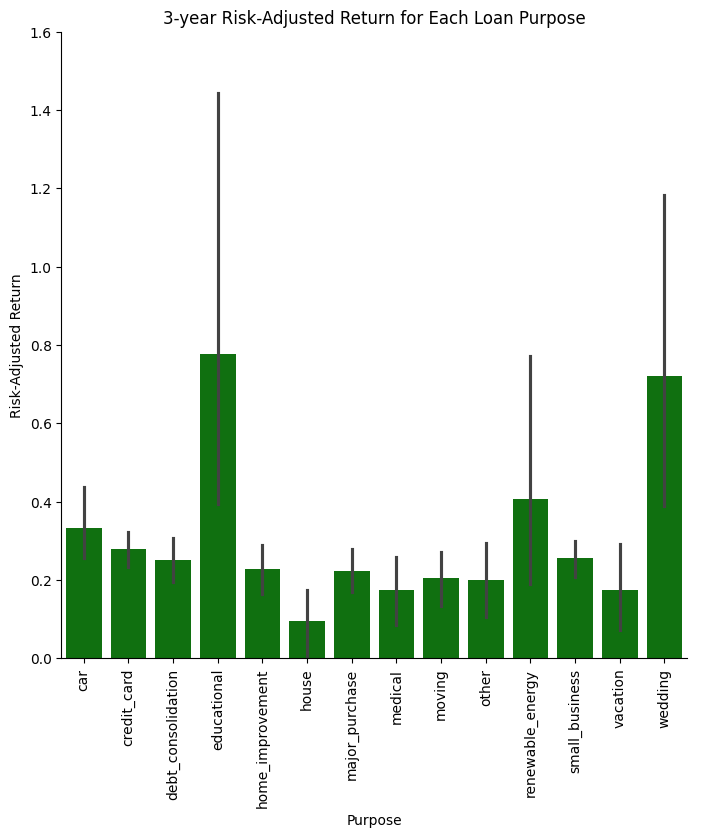

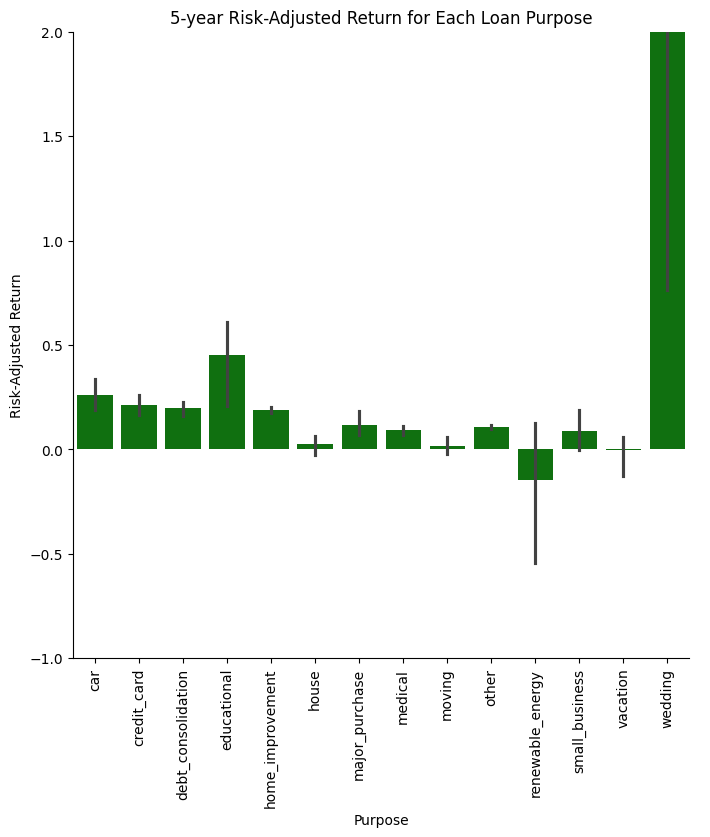

In [ ]:
def gen_graph_3y(s_final, y_var):
    # Reset the index so 'purpose' are regular columns
    df_reset = s_final.reset_index()

    # Sort the DataFrame based on 'purpose' for consistent ordering
    df_sorted = df_reset.sort_values(by=['purpose', 'fico_score_group'])

    # Specify the order for 'purpose' to keep axis orders consistent across plots
    purpose_order = sorted(df_reset['purpose'].unique())

    # Plotting
    sns.catplot(x='purpose', y=y_var, data=df_sorted, kind='bar', height=7, aspect=1,
                order=purpose_order, color='green')

    plt.xticks(rotation=90)
    plt.title('3-year Risk-Adjusted Return for Each Loan Purpose')
    plt.ylabel('Risk-Adjusted Return')
    plt.xlabel('Purpose')
    plt.ylim(0, 1.6)

    # Display the plot
    plt.show()

def gen_graph_5y(s_final, y_var):
    # Reset the index so 'purpose' are regular columns
    df_reset = s_final.reset_index()

    # Sort the DataFrame based on 'purpose' for consistent ordering
    df_sorted = df_reset.sort_values(by=['purpose', 'fico_score_group'])

    # Specify the order for 'purpose' to keep axis orders consistent across plots
    purpose_order = sorted(df_reset['purpose'].unique())

    # Plotting
    sns.catplot(x='purpose', y=y_var, data=df_sorted, kind='bar', height=7, aspect=1,
                order=purpose_order, color='green')

    plt.xticks(rotation=90)
    plt.title('5-year Risk-Adjusted Return for Each Loan Purpose')
    plt.ylabel('Risk-Adjusted Return')
    plt.xlabel('Purpose')
    plt.ylim(-1, 2)

    plt.show()

gen_graph_3y(final_3y, 'sharpe_ratio')
gen_graph_5y(final_5y, 'sharpe_ratio')

Now for each FICO range:

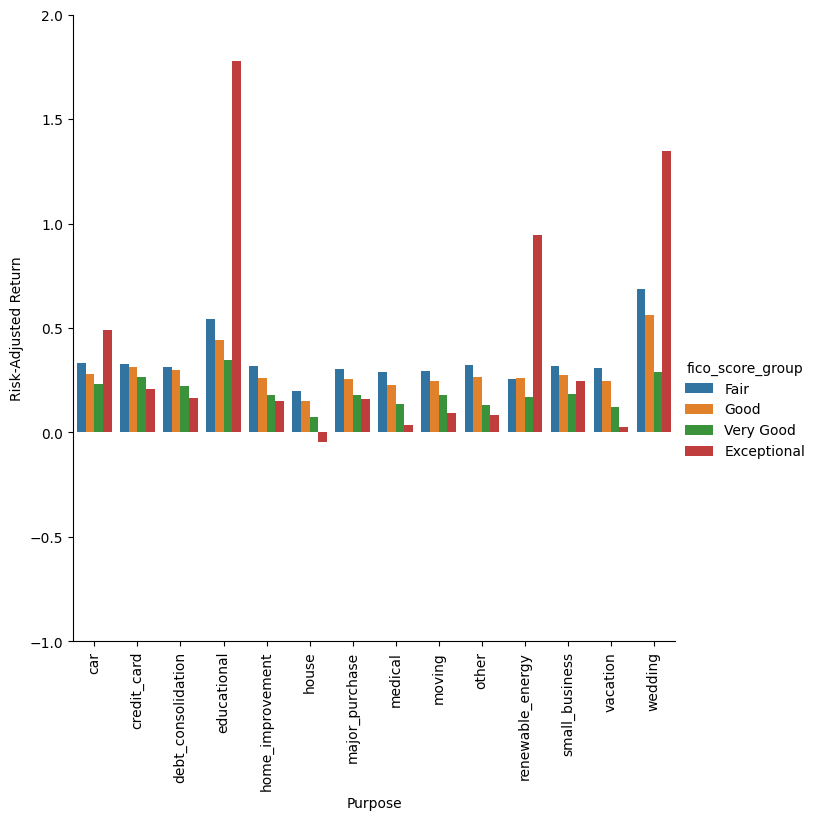

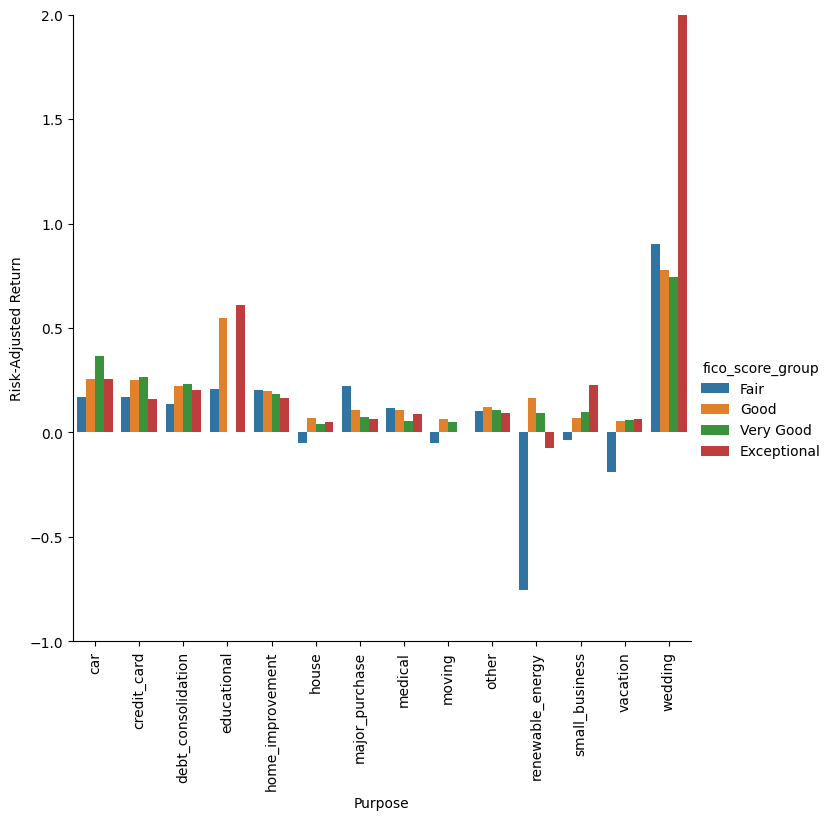

In [ ]:
def gen_graph(s_final, y_var):
    # Reset the index so 'purpose' and 'fico_score_group' are regular columns
    df_reset = s_final.reset_index()

    # Sort the DataFrame based on 'fico_score_group' for consistent ordering
    # If you also want to sort by 'purpose', you can add it to the sort_values list
    df_sorted = df_reset.sort_values(by=['purpose', 'fico_score_group'])

    # Specify the order for 'purpose' and 'fico_score_group' to keep axis orders consistent across plots
    purpose_order = sorted(df_reset['purpose'].unique())
    fico_score_group_order = ['Fair', 'Good', 'Very Good', 'Exceptional']  # Example, adjust based on your actual data

    # Plotting
    sns.catplot(x='purpose', y=y_var, hue='fico_score_group', data=df_sorted, kind='bar', height=7, aspect=1,
                order=purpose_order, hue_order=fico_score_group_order)

    plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
    plt.ylabel('Risk-Adjusted Return')  # Y-axis label
    plt.xlabel('Purpose')  # X-axis label
    plt.ylim(-1, 2)  # Adjust as necessary

    # Display the plot
    plt.show()

gen_graph(final_3y, 'sharpe_ratio')
gen_graph(final_5y, 'sharpe_ratio')

# Recommendation
Overall, we recommend that Dr. D invest in loans with higher risk-adjusted returns.

**Loan Purpose:** Wedding and Education loans yielded highest risk-adjusted returns. Housing loans have overall lowest performance.

**Loan Term:** 3-year loans showed more consistency in returns  and lower probability of default than 5-year loans

**Default Rate:** Small Business loans had highest default rate; Car and Wedding had lowest likelihood of defaulting